In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
from uncertainties import ufloat
from uncertainties.umath import * 
from uncertainties import unumpy as unp

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
GLEAM = pd.read_csv('CSV/fix_GLEAM.csv')
GLEAM = GLEAM.drop( columns = ['Unnamed: 0'])
GLEAM = GLEAM.sort_values('HRS', ascending=True)
GLEAM = GLEAM.reset_index(drop=True)
GLEAM['dist'] = GLEAM['diat Mpc']
GLEAM = GLEAM.drop( columns = ['diat Mpc'])
GLEAM

,GLEAM,bckwide,lrmswide,Fpwide,e_Fpwide,Fintwide,e_Fintwide,awide,e_awide,bwide,e_bwide,pawide,e_pawide,resmwide,resstdwide,eabsFpct,efitFpct,psfawide,psfbwide,psfPAwide,bck076,lrms076,Fp076,e_Fp076,Fint076,e_Fint076,a076,b076,pa076,resm076,resstd076,psfa076,psfb076,psfPA076,bck084,lrms084,Fp084,e_Fp084,Fint084,e_Fint084,a084,b084,pa084,resm084,resstd084,psfa084,psfb084,psfPA084,bck092,lrms092,Fp092,e_Fp092,Fint092,e_Fint092,a092,b092,pa092,resm092,resstd092,psfa092,psfb092,psfPA092,bck099,lrms099,Fp099,e_Fp099,Fint099,e_Fint099,a099,b099,pa099,resm099,resstd099,psfa099,psfb099,psfPA099,bck107,lrms107,Fp107,e_Fp107,Fint107,e_Fint107,a107,b107,pa107,resm107,resstd107,psfa107,psfb107,psfPA107,bck115,lrms115,Fp115,e_Fp115,Fint115,e_Fint115,a115,b115,pa115,resm115,resstd115,psfa115,psfb115,psfPA115,bck122,lrms122,Fp122,e_Fp122,Fint122,e_Fint122,a122,b122,pa122,resm122,resstd122,psfa122,psfb122,psfPA122,bck130,lrms130,Fp130,e_Fp130,Fint130,e_Fint130,a130,b130,pa130,resm130,resstd130,psfa130,psfb130,psfPA130,bck143,lrms143,Fp143,e_Fp143,Fint143,e_Fint143,a143,b143,pa143,resm143,resstd143,psfa143,psfb143,psfPA143,bck151,lrms151,Fp151,e_Fp151,Fint151,e_Fint151,a151,b151,pa151,resm151,resstd151,psfa151,psfb151,psfPA151,bck158,lrms158,Fp158,e_Fp158,Fint158,e_Fint158,a158,b158,pa158,resm158,resstd158,psfa158,psfb158,psfPA158,bck166,lrms166,Fp166,e_Fp166,Fint166,e_Fint166,a166,b166,pa166,resm166,resstd166,psfa166,psfb166,psfPA166,bck174,lrms174,Fp174,e_Fp174,Fint174,e_Fint174,a174,b174,pa174,resm174,resstd174,psfa174,psfb174,psfPA174,bck181,lrms181,Fp181,e_Fp181,Fint181,e_Fint181,a181,b181,pa181,resm181,resstd181,psfa181,psfb181,psfPA181,bck189,lrms189,Fp189,e_Fp189,Fint189,e_Fint189,a189,b189,pa189,resm189,resstd189,psfa189,psfb189,psfPA189,bck197,lrms197,Fp197,e_Fp197,Fint197,e_Fint197,a197,b197,pa197,resm197,resstd197,psfa197,psfb197,psfPA197,bck204,lrms204,Fp204,e_Fp204,Fint204,e_Fint204,a204,b204,pa204,resm204,resstd204,psfa204,psfb204,psfPA204,bck212,lrms212,Fp212,e_Fp212,Fint212,e_Fint212,a212,b212,pa212,resm212,resstd212,psfa212,psfb212,psfPA212,bck220,lrms220,Fp220,e_Fp220,Fint220,e_Fint220,a220,b220,pa220,resm220,resstd220,psfa220,psfb220,psfPA220,bck227,lrms227,Fp227,e_Fp227,Fint227,e_Fint227,a227,b227,pa227,resm227,resstd227,psfa227,psfb227,psfPA227,alpha,e_alpha,chi2,Fintfit200,e_Fintfit200,HRS,dist
0,J105236+225606,-0.001369,0.020105,0.211118,0.019003,0.263724,0.027681,191.742,6.90835,163.2375,6.564193,-2.115399,1.490420,0.001017,0.003848,13,3,185.788,134.865,-0.192918,0.062602,0.180361,0.189258,0.155194,0.198280,0.162593,437.238,329.122,-2.115399,-0.025744,0.162588,434.660,316.012,0.947490,-0.022242,0.149748,0.201790,0.128169,0.213687,0.135726,396.555,297.923,-2.115399,0.018057,0.114659,393.710,283.373,0.770726,-0.051440,0.135744,0.360703,0.115850,0.385617,0.123852,367.772,276.977,-2.115399,-0.001810,0.128212,364.702,261.263,0.540791,-0.035022,0.127819,0.320195,0.110421,0.345915,0.119291,340.961,258.800,-2.115399,0.021087,0.080484,337.648,241.909,1.360806,-0.063585,0.094622,0.317115,0.080549,0.349236,0.088707,315.542,232.513,-2.115399,-0.023282,0.094932,311.960,213.552,-0.934435,-0.029077,0.073717,0.330558,0.061668,0.368625,0.068770,294.751,220.157,-2.115399,-0.004543,0.047470,290.913,200.028,-1.036168,-0.011926,0.066525,0.253480,0.055467,0.285915,0.062564,279.624,210.573,-2.115399,-0.014778,0.061118,275.575,189.429,-0.481280,-0.005544,0.058542,0.268924,0.049140,0.306670,0.056037,269.106,202.441,-2.115399,-0.003556,0.065017,264.896,180.346,-0.445918,-0.018813,0.043886,0.236606,0.036279,0.276621,0.042415,247.039,187.576,-2.115399,-0.000156,0.028724,242.446,163.483,0.544218,-0.008367,0.034616,0.195485,0.028487,0.231525,0.033738,232.230,181.732,-2.115399,0.010651,0.020788,227.338,156.744,0.210590,-0.004764,0.033732,0.251189,0.027812,0.302103,0.033449,223.461,175.032,-2.115399,-0.000288,0.029349,218.373,148.923,0.361488,-0.009654,0.033803,0.217687,0.027615,0.265477,0.033677,215.143,169.817,-2.115399,0.022904,0.038028,209.853,14

In [4]:
dist = GLEAM['dist'].to_list()
df = pd.read_csv('CSV/fix_Ciesla_2012_IR250um.csv')
df = df.drop(columns = 'Unnamed: 0')
df = df.sort_values('HRS', ascending=True )
df = df.reset_index(drop=True)
df['dist'] = dist

In [5]:
df

,HRS,f_S250,S250,e_S250,N250,e250i,dist
0,25,1,8680.5,94.6,593,22.4,18.24
1,36,1,12200.6,219.7,865,46.4,21.94
2,50,1,9178.2,87.6,352,22.3,21.43
3,102,1,64026.1,2329.3,5304,44.0,17.00
4,114,1,54637.8,912.0,5423,47.8,17.00
5,122,1,66006.4,2209.8,11387,65.4,17.00
6,144,1,8570.1,314.2,982,31.2,17.00
7,163,1,8132.3,684.6,1392,16.9,17.00
8,190,1,57336.0,1379.6,4299,38.9,17.00
9,201,1,45589.8,429.1,1687,68.6,17.00


In [6]:
df2 = pd.read_csv('CSV/fix_Cortese_2014_IR_100_160.csv')
df2 = df2.drop(columns = 'Unnamed: 0')
df2 = df2.sort_values('HRS', ascending=True )
df2 = df2.reset_index(drop=True)
df2['dist'] = dist

In [7]:
df2

,HRS,TT,f_F100,l_F100,F100,e_F100,f_F160,l_F160,F160,e_F160,dist
0,25,7,1,NaN,21.647,1.187,1,NaN,21.174,1.142,18.24
1,36,4,1,NaN,35.557,1.977,1,NaN,31.358,1.651,21.94
2,50,7,1,NaN,20.970,1.076,1,NaN,22.078,1.141,21.43
3,102,7,1,NaN,111.145,6.099,1,NaN,141.580,7.520,17.00
4,114,6,1,NaN,102.907,5.799,1,NaN,118.600,6.850,17.00
5,122,6,1,NaN,87.905,6.335,1,NaN,123.549,7.210,17.00
6,144,5,1,NaN,18.998,1.033,1,NaN,19.916,1.193,17.00
7,163,5,1,NaN,11.949,0.863,1,NaN,15.454,1.090,17.00
8,190,5,1,NaN,74.118,5.570,1,NaN,104.850,5.821,17.00
9,201,6,1,NaN,75.281,3.999,1,NaN,93.527,4.864,17.00


In [8]:
df3 = pd.read_csv('CSV/fix_IR_FLUX_24_70µm_fromBendo2012.csv')
df3 = df3.drop(columns = 'Unnamed: 0')
df3 = df3.sort_values('HRS', ascending=True )
df3 = df3.reset_index(drop=True)
dist_df3 = [ 21.94, 21.43, 17.0, 17.0, 17.0, 17.0,
 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0]

df3['dist'] = dist_df3

In [9]:
df3

,HRS,l_F24,F24,e_F24,l_F70,F70,e_F70,l_F160,F160,e_F160,dist
0,36.0,NaN,3.0895,0.1243,NaN,19.268,1.929,NaN,21.44,2.57,21.94
1,50.0,NaN,0.7768,0.0311,NaN,NaN,NaN,NaN,NaN,NaN,21.43
2,102.0,NaN,4.2582,0.1703,NaN,44.920,4.492,NaN,123.29,14.81,17.00
3,114.0,NaN,3.9380,0.1576,NaN,NaN,NaN,NaN,99.78,11.98,17.00
4,122.0,NaN,3.4082,0.1363,NaN,36.015,3.602,NaN,123.21,14.79,17.00
5,144.0,NaN,2.5714,0.1029,NaN,10.730,1.073,NaN,16.08,1.94,17.00
6,163.0,NaN,0.3026,0.0121,NaN,5.932,0.594,NaN,15.01,1.80,17.00
7,190.0,NaN,2.2216,0.0889,NaN,28.284,2.829,NaN,98.41,11.81,17.00
8,203.0,NaN,0.8125,0.0325,NaN,9.742,0.974,NaN,12.93,1.55,17.00
9,204.0,NaN,1.7829,0.0714,NaN,16.427,1.644,NaN,58.76,7.05,17.00


# 光度の計算をする
'F = L / ( 4 pi r^2 )'

In [10]:
def Flux_to_L(Flux,dist):
    return Flux * 4 * np.pi * dist**2

In [11]:
'Ciesla_2012'
df

,HRS,f_S250,S250,e_S250,N250,e250i,dist
0,25,1,8680.5,94.6,593,22.4,18.24
1,36,1,12200.6,219.7,865,46.4,21.94
2,50,1,9178.2,87.6,352,22.3,21.43
3,102,1,64026.1,2329.3,5304,44.0,17.00
4,114,1,54637.8,912.0,5423,47.8,17.00
5,122,1,66006.4,2209.8,11387,65.4,17.00
6,144,1,8570.1,314.2,982,31.2,17.00
7,163,1,8132.3,684.6,1392,16.9,17.00
8,190,1,57336.0,1379.6,4299,38.9,17.00
9,201,1,45589.8,429.1,1687,68.6,17.00


In [12]:
Flux = unp.uarray( df['S250']/1000, df['e_S250']/1000)
df['L_250um'] = Flux_to_L(Flux,df['dist'])

これの単位は　Jy  Mpc^2 

Mpc = 3.086e+24 cm

Jy = 10e−23 erg･s^-1･cm^-2･Hz^-1

Jy Mpc^2 = 10e−23 erg･s^-1･cm^-2･Hz^-１ * ( 3.086e+24 cm )^2

Jy Mpc^2 = 3.086^2 e+25 erg s^-1 Hz^-1

太陽光度は 3.828 × 10e+33 erg/s

In [13]:
def L_divide_L_sum(L):
    return L * 3.086**2 * 10**(25) / (3.828 * 10**33)

def L_to_nuL( L, wavelength):
    return L * 299792458 / wavelength * 10 **6

In [14]:
df['L_250um / L_sun'] = L_divide_L_sum( df['L_250um'] )
df['nu * L_250um / L_sun'] = L_to_nuL( df['L_250um / L_sun'] , 250 )

In [15]:
df

,HRS,f_S250,S250,e_S250,N250,e250i,dist,L_250um,L_250um / L_sun,nu * L_250um / L_sun
0,25,1,8680.5,94.6,593,22.4,18.24,(3.63+/-0.04)e+04,0.000903+/-0.000010,(1.083+/-0.012)e+09
1,36,1,12200.6,219.7,865,46.4,21.94,(7.38+/-0.13)e+04,0.001836+/-0.000033,(2.20+/-0.04)e+09
2,50,1,9178.2,87.6,352,22.3,21.43,(5.30+/-0.05)e+04,0.001318+/-0.000013,(1.580+/-0.015)e+09
3,102,1,64026.1,2329.3,5304,44.0,17.00,(2.33+/-0.08)e+05,0.00578+/-0.00021,(6.94+/-0.25)e+09
4,114,1,54637.8,912.0,5423,47.8,17.00,(1.984+/-0.033)e+05,0.00494+/-0.00008,(5.92+/-0.10)e+09
5,122,1,66006.4,2209.8,11387,65.4,17.00,(2.40+/-0.08)e+05,0.00596+/-0.00020,(7.15+/-0.24)e+09
6,144,1,8570.1,314.2,982,31.2,17.00,(3.11+/-0.11)e+04,0.000774+/-0.000028,(9.29+/-0.34)e+08
7,163,1,8132.3,684.6,1392,16.9,17.00,(2.95+/-0.25)e+04,0.00073+/-0.00006,(8.8+/-0.7)e+08
8,190,1,57336.0,1379.6,4299,38.9,17.00,(2.08+/-0.05)e+05,0.00518+/-0.00012,(6.21+/-0.15)e+09
9,201,1,45589.8,429.1,1687,68.6,17.00,(1.656+/-0.016)e+05,0.00412+/-0.00004,(4.94+/-0.05)e+09


In [16]:
'Cortese_2014'
'単位 Jy '
df2

,HRS,TT,f_F100,l_F100,F100,e_F100,f_F160,l_F160,F160,e_F160,dist
0,25,7,1,NaN,21.647,1.187,1,NaN,21.174,1.142,18.24
1,36,4,1,NaN,35.557,1.977,1,NaN,31.358,1.651,21.94
2,50,7,1,NaN,20.970,1.076,1,NaN,22.078,1.141,21.43
3,102,7,1,NaN,111.145,6.099,1,NaN,141.580,7.520,17.00
4,114,6,1,NaN,102.907,5.799,1,NaN,118.600,6.850,17.00
5,122,6,1,NaN,87.905,6.335,1,NaN,123.549,7.210,17.00
6,144,5,1,NaN,18.998,1.033,1,NaN,19.916,1.193,17.00
7,163,5,1,NaN,11.949,0.863,1,NaN,15.454,1.090,17.00
8,190,5,1,NaN,74.118,5.570,1,NaN,104.850,5.821,17.00
9,201,6,1,NaN,75.281,3.999,1,NaN,93.527,4.864,17.00


In [17]:
Flux = unp.uarray( df2['F100'], df2['e_F100'])
df2['L_100um'] = Flux_to_L( Flux , df2['dist'])
df2['L_100um / L_sun'] = L_divide_L_sum( df2['L_100um'] )
df2['nu * L_100um / L_sun'] = L_to_nuL( df2['L_100um / L_sun'] , 100 )

In [18]:
Flux = unp.uarray( df2['F160'], df2['e_F160'])
df2['L_160um'] = Flux_to_L( Flux, df2['dist'])
df2['L_160um / L_sun'] = L_divide_L_sum( df2['L_160um'] )
df2['nu * L_160um / L_sun'] = L_to_nuL( df2['L_160um / L_sun'] , 160 )

In [19]:
df2

,HRS,TT,f_F100,l_F100,F100,e_F100,f_F160,l_F160,F160,e_F160,dist,L_100um,L_100um / L_sun,nu * L_100um / L_sun,L_160um,L_160um / L_sun,nu * L_160um / L_sun
0,25,7,1,NaN,21.647,1.187,1,NaN,21.174,1.142,18.24,(9.1+/-0.5)e+04,0.00225+/-0.00012,(6.7+/-0.4)e+09,(8.9+/-0.5)e+04,0.00220+/-0.00012,(4.13+/-0.22)e+09
1,36,4,1,NaN,35.557,1.977,1,NaN,31.358,1.651,21.94,(2.15+/-0.12)e+05,0.00535+/-0.00030,(1.60+/-0.09)e+10,(1.90+/-0.10)e+05,0.00472+/-0.00025,(8.8+/-0.5)e+09
2,50,7,1,NaN,20.970,1.076,1,NaN,22.078,1.141,21.43,(1.21+/-0.06)e+05,0.00301+/-0.00015,(9.0+/-0.5)e+09,(1.27+/-0.07)e+05,0.00317+/-0.00016,(5.94+/-0.31)e+09
3,102,7,1,NaN,111.145,6.099,1,NaN,141.580,7.520,17.00,(4.04+/-0.22)e+05,0.0100+/-0.0006,(3.01+/-0.17)e+10,(5.14+/-0.27)e+05,0.0128+/-0.0007,(2.40+/-0.13)e+10
4,114,6,1,NaN,102.907,5.799,1,NaN,118.600,6.850,17.00,(3.74+/-0.21)e+05,0.0093+/-0.0005,(2.79+/-0.16)e+10,(4.31+/-0.25)e+05,0.0107+/-0.0006,(2.01+/-0.12)e+10
5,122,6,1,NaN,87.905,6.335,1,NaN,123.549,7.210,17.00,(3.19+/-0.23)e+05,0.0079+/-0.0006,(2.38+/-0.17)e+10,(4.49+/-0.26)e+05,0.0112+/-0.0007,(2.09+/-0.12)e+10
6,144,5,1,NaN,18.998,1.033,1,NaN,19.916,1.193,17.00,(6.9+/-0.4)e+04,0.00172+/-0.00009,(5.15+/-0.28)e+09,(7.2+/-0.4)e+04,0.00180+/-0.00011,(3.37+/-0.20)e+09
7,163,5,1,NaN,11.949,0.863,1,NaN,15.454,1.090,17.00,(4.34+/-0.31)e+04,0.00108+/-0.00008,(3.24+/-0.23)e+09,(5.6+/-0.4)e+04,0.00140+/-0.00010,(2.62+/-0.18)e+09
8,190,5,1,NaN,74.118,5.570,1,NaN,104.850,5.821,17.00,(2.69+/-0.20)e+05,0.0067+/-0.0005,(2.01+/-0.15)e+10,(3.81+/-0.21)e+05,0.0095+/-0.0005,(1.77+/-0.10)e+10
9,201,6,1,NaN,75.281,3.999,1,NaN,93.527,4.864,17.00,(2.73+/-0.15)e+05,0.0068+/-0.0004,(2.04+/-0.11)e+10,(3.40+/-0.18)e+05,0.0085+/-0.0004,(1.58+/-0.08)e+10


In [20]:
'Bend 2012' '単位はJy'
'HRS25 , HRS201 は欠損値'
df3

,HRS,l_F24,F24,e_F24,l_F70,F70,e_F70,l_F160,F160,e_F160,dist
0,36.0,NaN,3.0895,0.1243,NaN,19.268,1.929,NaN,21.44,2.57,21.94
1,50.0,NaN,0.7768,0.0311,NaN,NaN,NaN,NaN,NaN,NaN,21.43
2,102.0,NaN,4.2582,0.1703,NaN,44.920,4.492,NaN,123.29,14.81,17.00
3,114.0,NaN,3.9380,0.1576,NaN,NaN,NaN,NaN,99.78,11.98,17.00
4,122.0,NaN,3.4082,0.1363,NaN,36.015,3.602,NaN,123.21,14.79,17.00
5,144.0,NaN,2.5714,0.1029,NaN,10.730,1.073,NaN,16.08,1.94,17.00
6,163.0,NaN,0.3026,0.0121,NaN,5.932,0.594,NaN,15.01,1.80,17.00
7,190.0,NaN,2.2216,0.0889,NaN,28.284,2.829,NaN,98.41,11.81,17.00
8,203.0,NaN,0.8125,0.0325,NaN,9.742,0.974,NaN,12.93,1.55,17.00
9,204.0,NaN,1.7829,0.0714,NaN,16.427,1.644,NaN,58.76,7.05,17.00


In [21]:
Flux = unp.uarray( df3['F24'], df3['e_F24'])
df3['L_24um'] = Flux_to_L( Flux , df3['dist'])
df3['L_24um / L_sun'] = L_divide_L_sum( df3['L_24um'] )
df3['nu * L_24um / L_sun'] = L_to_nuL( df3['L_24um / L_sun'] , 24 )

In [22]:
Flux = unp.uarray( df3['F70'], df3['e_F70'])
df3['L_70um'] = Flux_to_L( Flux , df3['dist'])
df3['L_70um / L_sun'] = L_divide_L_sum( df3['L_70um'] )
df3['nu * L_70um / L_sun'] = L_to_nuL( df3['L_70um / L_sun'] , 70 )

C:\Users\omega\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2387: RuntimeWarning: invalid value encountered in <lambda> (vectorized)
  outputs = ufunc(*inputs)


In [23]:
Flux = unp.uarray( df3['F160'], df3['e_F160'])
df3['L_160um'] = Flux_to_L( Flux , df3['dist'])
df3['L_160um / L_sun'] = L_divide_L_sum( df3['L_160um'] )
df3['nu * L_160um / L_sun'] = L_to_nuL( df3['L_160um / L_sun'] , 160 )

C:\Users\omega\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2387: RuntimeWarning: invalid value encountered in <lambda> (vectorized)
  outputs = ufunc(*inputs)


In [24]:
df3

,HRS,l_F24,F24,e_F24,l_F70,F70,e_F70,l_F160,F160,e_F160,dist,L_24um,L_24um / L_sun,nu * L_24um / L_sun,L_70um,L_70um / L_sun,nu * L_70um / L_sun,L_160um,L_160um / L_sun,nu * L_160um / L_sun
0,36.0,NaN,3.0895,0.1243,NaN,19.268,1.929,NaN,21.44,2.57,21.94,(1.87+/-0.08)e+04,0.000465+/-0.000019,(5.81+/-0.23)e+09,(1.17+/-0.12)e+05,0.00290+/-0.00029,(1.24+/-0.12)e+10,(1.30+/-0.16)e+05,0.0032+/-0.0004,(6.0+/-0.7)e+09
1,50.0,NaN,0.7768,0.0311,NaN,NaN,NaN,NaN,NaN,NaN,21.43,(4.48+/-0.18)e+03,0.000112+/-0.000004,(1.39+/-0.06)e+09,nan+/-nan,nan+/-nan,nan+/-nan,nan+/-nan,nan+/-nan,nan+/-nan
2,102.0,NaN,4.2582,0.1703,NaN,44.920,4.492,NaN,123.29,14.81,17.00,(1.55+/-0.06)e+04,0.000385+/-0.000015,(4.81+/-0.19)e+09,(1.63+/-0.16)e+05,0.0041+/-0.0004,(1.74+/-0.17)e+10,(4.5+/-0.5)e+05,0.0111+/-0.0013,(2.09+/-0.25)e+10
3,114.0,NaN,3.9380,0.1576,NaN,NaN,NaN,NaN,99.78,11.98,17.00,(1.43+/-0.06)e+04,0.000356+/-0.000014,(4.44+/-0.18)e+09,nan+/-nan,nan+/-nan,nan+/-nan,(3.6+/-0.4)e+05,0.0090+/-0.0011,(1.69+/-0.20)e+10
4,122.0,NaN,3.4082,0.1363,NaN,36.015,3.602,NaN,123.21,14.79,17.00,(1.24+/-0.05)e+04,0.000308+/-0.000012,(3.85+/-0.15)e+09,(1.31+/-0.13)e+05,0.00325+/-0.00033,(1.39+/-0.14)e+10,(4.5+/-0.5)e+05,0.0111+/-0.0013,(2.09+/-0.25)e+10
5,144.0,NaN,2.5714,0.1029,NaN,10.730,1.073,NaN,16.08,1.94,17.00,(9.3+/-0.4)e+03,0.000232+/-0.000009,(2.90+/-0.12)e+09,(3.9+/-0.4)e+04,0.00097+/-0.00010,(4.2+/-0.4)e+09,(5.8+/-0.7)e+04,0.00145+/-0.00018,(2.72+/-0.33)e+09
6,163.0,NaN,0.3026,0.0121,NaN,5.932,0.594,NaN,15.01,1.80,17.00,(1.10+/-0.04)e+03,(2.73+/-0.11)e-05,(3.42+/-0.14)e+08,(2.15+/-0.22)e+04,0.00054+/-0.00005,(2.30+/-0.23)e+09,(5.5+/-0.7)e+04,0.00136+/-0.00016,(2.54+/-0.30)e+09
7,190.0,NaN,2.2216,0.0889,NaN,28.284,2.829,NaN,98.41,11.81,17.00,(8.07+/-0.32)e+03,0.000201+/-0.000008,(2.51+/-0.10)e+09,(1.03+/-0.10)e+05,0.00256+/-0.00026,(1.09+/-0.11)e+10,(3.6+/-0.4)e+05,0.0089+/-0.0011,(1.67+/-0.20)e+10
8,203.0,NaN,0.8125,0.0325,NaN,9.742,0.974,NaN,12.93,1.55,17.00,(2.95+/-0.12)e+03,(7.34+/-0.29)e-05,(9.2+/-0.4)e+08,(3.54+/-0.35)e+04,0.00088+/-0.00009,(3.8+/-0.4)e+09,(4.7+/-0.6)e+04,0.00117+/-0.00014,(2.19+/-0.26)e+09
9,204.0,NaN,1.7829,0.0714,NaN,16.427,1.644,NaN,58.76,7.05,17.00,(6.47+/-0.26)e+03,0.000161+/-0.000006,(2.01+/-0.08)e+09,(6.0+/-0.6)e+04,0.00148+/-0.00015,(6.4+/-0.6)e+09,(2.13+/-0.26)e+05,0.0053+/-0.0006,(9.9+/-1.2)e+09


### 

# 全赤外範囲の光度を計算できる
Galametz et al. (2013)から全IRバンドの全光度を求める
160umのデータが持って来るdf2とdf3で違う

In [25]:
df

,HRS,f_S250,S250,e_S250,N250,e250i,dist,L_250um,L_250um / L_sun,nu * L_250um / L_sun
0,25,1,8680.5,94.6,593,22.4,18.24,(3.63+/-0.04)e+04,0.000903+/-0.000010,(1.083+/-0.012)e+09
1,36,1,12200.6,219.7,865,46.4,21.94,(7.38+/-0.13)e+04,0.001836+/-0.000033,(2.20+/-0.04)e+09
2,50,1,9178.2,87.6,352,22.3,21.43,(5.30+/-0.05)e+04,0.001318+/-0.000013,(1.580+/-0.015)e+09
3,102,1,64026.1,2329.3,5304,44.0,17.00,(2.33+/-0.08)e+05,0.00578+/-0.00021,(6.94+/-0.25)e+09
4,114,1,54637.8,912.0,5423,47.8,17.00,(1.984+/-0.033)e+05,0.00494+/-0.00008,(5.92+/-0.10)e+09
5,122,1,66006.4,2209.8,11387,65.4,17.00,(2.40+/-0.08)e+05,0.00596+/-0.00020,(7.15+/-0.24)e+09
6,144,1,8570.1,314.2,982,31.2,17.00,(3.11+/-0.11)e+04,0.000774+/-0.000028,(9.29+/-0.34)e+08
7,163,1,8132.3,684.6,1392,16.9,17.00,(2.95+/-0.25)e+04,0.00073+/-0.00006,(8.8+/-0.7)e+08
8,190,1,57336.0,1379.6,4299,38.9,17.00,(2.08+/-0.05)e+05,0.00518+/-0.00012,(6.21+/-0.15)e+09
9,201,1,45589.8,429.1,1687,68.6,17.00,(1.656+/-0.016)e+05,0.00412+/-0.00004,(4.94+/-0.05)e+09


In [26]:
df2

,HRS,TT,f_F100,l_F100,F100,e_F100,f_F160,l_F160,F160,e_F160,dist,L_100um,L_100um / L_sun,nu * L_100um / L_sun,L_160um,L_160um / L_sun,nu * L_160um / L_sun
0,25,7,1,NaN,21.647,1.187,1,NaN,21.174,1.142,18.24,(9.1+/-0.5)e+04,0.00225+/-0.00012,(6.7+/-0.4)e+09,(8.9+/-0.5)e+04,0.00220+/-0.00012,(4.13+/-0.22)e+09
1,36,4,1,NaN,35.557,1.977,1,NaN,31.358,1.651,21.94,(2.15+/-0.12)e+05,0.00535+/-0.00030,(1.60+/-0.09)e+10,(1.90+/-0.10)e+05,0.00472+/-0.00025,(8.8+/-0.5)e+09
2,50,7,1,NaN,20.970,1.076,1,NaN,22.078,1.141,21.43,(1.21+/-0.06)e+05,0.00301+/-0.00015,(9.0+/-0.5)e+09,(1.27+/-0.07)e+05,0.00317+/-0.00016,(5.94+/-0.31)e+09
3,102,7,1,NaN,111.145,6.099,1,NaN,141.580,7.520,17.00,(4.04+/-0.22)e+05,0.0100+/-0.0006,(3.01+/-0.17)e+10,(5.14+/-0.27)e+05,0.0128+/-0.0007,(2.40+/-0.13)e+10
4,114,6,1,NaN,102.907,5.799,1,NaN,118.600,6.850,17.00,(3.74+/-0.21)e+05,0.0093+/-0.0005,(2.79+/-0.16)e+10,(4.31+/-0.25)e+05,0.0107+/-0.0006,(2.01+/-0.12)e+10
5,122,6,1,NaN,87.905,6.335,1,NaN,123.549,7.210,17.00,(3.19+/-0.23)e+05,0.0079+/-0.0006,(2.38+/-0.17)e+10,(4.49+/-0.26)e+05,0.0112+/-0.0007,(2.09+/-0.12)e+10
6,144,5,1,NaN,18.998,1.033,1,NaN,19.916,1.193,17.00,(6.9+/-0.4)e+04,0.00172+/-0.00009,(5.15+/-0.28)e+09,(7.2+/-0.4)e+04,0.00180+/-0.00011,(3.37+/-0.20)e+09
7,163,5,1,NaN,11.949,0.863,1,NaN,15.454,1.090,17.00,(4.34+/-0.31)e+04,0.00108+/-0.00008,(3.24+/-0.23)e+09,(5.6+/-0.4)e+04,0.00140+/-0.00010,(2.62+/-0.18)e+09
8,190,5,1,NaN,74.118,5.570,1,NaN,104.850,5.821,17.00,(2.69+/-0.20)e+05,0.0067+/-0.0005,(2.01+/-0.15)e+10,(3.81+/-0.21)e+05,0.0095+/-0.0005,(1.77+/-0.10)e+10
9,201,6,1,NaN,75.281,3.999,1,NaN,93.527,4.864,17.00,(2.73+/-0.15)e+05,0.0068+/-0.0004,(2.04+/-0.11)e+10,(3.40+/-0.18)e+05,0.0085+/-0.0004,(1.58+/-0.08)e+10


In [27]:
df3

,HRS,l_F24,F24,e_F24,l_F70,F70,e_F70,l_F160,F160,e_F160,dist,L_24um,L_24um / L_sun,nu * L_24um / L_sun,L_70um,L_70um / L_sun,nu * L_70um / L_sun,L_160um,L_160um / L_sun,nu * L_160um / L_sun
0,36.0,NaN,3.0895,0.1243,NaN,19.268,1.929,NaN,21.44,2.57,21.94,(1.87+/-0.08)e+04,0.000465+/-0.000019,(5.81+/-0.23)e+09,(1.17+/-0.12)e+05,0.00290+/-0.00029,(1.24+/-0.12)e+10,(1.30+/-0.16)e+05,0.0032+/-0.0004,(6.0+/-0.7)e+09
1,50.0,NaN,0.7768,0.0311,NaN,NaN,NaN,NaN,NaN,NaN,21.43,(4.48+/-0.18)e+03,0.000112+/-0.000004,(1.39+/-0.06)e+09,nan+/-nan,nan+/-nan,nan+/-nan,nan+/-nan,nan+/-nan,nan+/-nan
2,102.0,NaN,4.2582,0.1703,NaN,44.920,4.492,NaN,123.29,14.81,17.00,(1.55+/-0.06)e+04,0.000385+/-0.000015,(4.81+/-0.19)e+09,(1.63+/-0.16)e+05,0.0041+/-0.0004,(1.74+/-0.17)e+10,(4.5+/-0.5)e+05,0.0111+/-0.0013,(2.09+/-0.25)e+10
3,114.0,NaN,3.9380,0.1576,NaN,NaN,NaN,NaN,99.78,11.98,17.00,(1.43+/-0.06)e+04,0.000356+/-0.000014,(4.44+/-0.18)e+09,nan+/-nan,nan+/-nan,nan+/-nan,(3.6+/-0.4)e+05,0.0090+/-0.0011,(1.69+/-0.20)e+10
4,122.0,NaN,3.4082,0.1363,NaN,36.015,3.602,NaN,123.21,14.79,17.00,(1.24+/-0.05)e+04,0.000308+/-0.000012,(3.85+/-0.15)e+09,(1.31+/-0.13)e+05,0.00325+/-0.00033,(1.39+/-0.14)e+10,(4.5+/-0.5)e+05,0.0111+/-0.0013,(2.09+/-0.25)e+10
5,144.0,NaN,2.5714,0.1029,NaN,10.730,1.073,NaN,16.08,1.94,17.00,(9.3+/-0.4)e+03,0.000232+/-0.000009,(2.90+/-0.12)e+09,(3.9+/-0.4)e+04,0.00097+/-0.00010,(4.2+/-0.4)e+09,(5.8+/-0.7)e+04,0.00145+/-0.00018,(2.72+/-0.33)e+09
6,163.0,NaN,0.3026,0.0121,NaN,5.932,0.594,NaN,15.01,1.80,17.00,(1.10+/-0.04)e+03,(2.73+/-0.11)e-05,(3.42+/-0.14)e+08,(2.15+/-0.22)e+04,0.00054+/-0.00005,(2.30+/-0.23)e+09,(5.5+/-0.7)e+04,0.00136+/-0.00016,(2.54+/-0.30)e+09
7,190.0,NaN,2.2216,0.0889,NaN,28.284,2.829,NaN,98.41,11.81,17.00,(8.07+/-0.32)e+03,0.000201+/-0.000008,(2.51+/-0.10)e+09,(1.03+/-0.10)e+05,0.00256+/-0.00026,(1.09+/-0.11)e+10,(3.6+/-0.4)e+05,0.0089+/-0.0011,(1.67+/-0.20)e+10
8,203.0,NaN,0.8125,0.0325,NaN,9.742,0.974,NaN,12.93,1.55,17.00,(2.95+/-0.12)e+03,(7.34+/-0.29)e-05,(9.2+/-0.4)e+08,(3.54+/-0.35)e+04,0.00088+/-0.00009,(3.8+/-0.4)e+09,(4.7+/-0.6)e+04,0.00117+/-0.00014,(2.19+/-0.26)e+09
9,204.0,NaN,1.7829,0.0714,NaN,16.427,1.644,NaN,58.76,7.05,17.00,(6.47+/-0.26)e+03,0.000161+/-0.000006,(2.01+/-0.08)e+09,(6.0+/-0.6)e+04,0.00148+/-0.00015,(6.4+/-0.6)e+09,(2.13+/-0.26)e+05,0.0053+/-0.0006,(9.9+/-1.2)e+09


欠損値
25 24 70 
36 
50 70
102 
114 70
122
144
163
190
201 24 70
203
204
205
220
247

24 と　70 の欠損値のものの計算

In [28]:
L_TIR_25 = 1.379 * df2['nu * L_100um / L_sun'][ df2['HRS'] == 25 ].values[0] \
+ 0.058 * df2['nu * L_160um / L_sun'][ df2['HRS'] == 25 ].values[0] \
+ 1.150 * df['nu * L_250um / L_sun'][ df['HRS'] == 25 ].values[0]
L_TIR_25

10792556753.146395+/-510748732.8799949

In [29]:
L_TIR_201 = 1.379 * df2['nu * L_100um / L_sun'][ df2['HRS'] == 201 ].values[0] \
+ 0.058 * df2['nu * L_160um / L_sun'][ df2['HRS'] == 201 ].values[0] \
+ 1.150 * df['nu * L_250um / L_sun'][ df['HRS'] == 201 ].values[0]
L_TIR_201

34717528967.03511+/-1495421445.655472

'70umが欠損値のものの計算'

In [30]:
L_TIR_50 = 2.667 * df3['nu * L_24um / L_sun'][ df3['HRS'] == 50 ].values[0] \
+ 0.848 * df2['nu * L_100um / L_sun'][ df2['HRS'] == 50 ].values[0] \
+ 0.319 * df2['nu * L_160um / L_sun'][ df2['HRS'] == 50 ].values[0] \
+ 0.847 * df['nu * L_250um / L_sun'][ df['HRS'] == 50 ].values[0]
L_TIR_50

14602562930.534014+/-431417842.8065344

In [31]:
L_TIR_114 = 2.667 * df3['nu * L_24um / L_sun'][ df3['HRS'] == 114 ].values[0]\
+ 0.848 * df2['nu * L_100um / L_sun'][ df2['HRS'] == 114 ].values[0]\
+ 0.319 * df2['nu * L_160um / L_sun'][ df2['HRS'] == 114 ].values[0]\
+ 0.847 * df['nu * L_250um / L_sun'][ df['HRS'] == 114 ].values[0]
L_TIR_114

46908807400.649086+/-1463912437.2783432

すべての値が揃っているものの計算

In [32]:
L_TIR_list = []
for i in [ 36, 102, 122,144, 163, 190, 203, 204, 205, 220, 247]:
    L_TIR = 2.023 * df3['nu * L_24um / L_sun'][ df3['HRS'] == i ].values[0] \
    + 0.523 * df3['nu * L_70um / L_sun'][ df3['HRS'] == i ].values[0]\
    + 0.390 * df2['nu * L_100um / L_sun'][ df2['HRS'] == i ].values[0] \
    + 0.577 * df3['nu * L_160um / L_sun'][ df3['HRS'] == i ].values[0] \
    + 0.721 * df['nu * L_250um / L_sun'][ df['HRS'] == i ].values[0]
    
    L_TIR_list.append([ i, L_TIR ])
    
L_TIR_list.insert( 0, [25 , L_TIR_25 ] )
L_TIR_list.insert( 2, [50 , L_TIR_50 ] )
L_TIR_list.insert( 4, [114 , L_TIR_114] )
L_TIR_list.insert( 9, [201 , L_TIR_201] )

In [33]:
L_TIR_list

[[25, 10792556753.146395+/-510748732.8799949],
 [36, 29575571155.703842+/-971017959.3540804],
 [50, 14602562930.534014+/-431417842.8065344],
 [102, 47598028467.82278+/-1875772275.4972212],
 [114, 46908807400.649086+/-1463912437.2783432],
 [122, 41547122312.90492+/-1786881344.0553732],
 [144, 12289364924.911547+/-388286940.60909516],
 [163, 5255040980.07794+/-239370459.81918177],
 [190, 32717237204.66415+/-1434425014.5548258],
 [201, 34717528967.03511+/-1495421445.655472],
 [203, 7264903512.246709+/-274128814.0670803],
 [204, 19520910695.856354+/-853026011.244578],
 [205, 26410406282.660828+/-927025773.0405704],
 [220, 11679434882.401014+/-613152825.7181002],
 [247, 19088439525.84935+/-761105682.7591331]]

In [34]:
L_TIR=np.array(L_TIR_list)[:,1]
L_TIR

array([10792556753.146395+/-510748732.8799949,
       29575571155.703842+/-971017959.3540804,
       14602562930.534014+/-431417842.8065344,
       47598028467.82278+/-1875772275.4972212,
       46908807400.649086+/-1463912437.2783432,
       41547122312.90492+/-1786881344.0553732,
       12289364924.911547+/-388286940.60909516,
       5255040980.07794+/-239370459.81918177,
       32717237204.66415+/-1434425014.5548258,
       34717528967.03511+/-1495421445.655472,
       7264903512.246709+/-274128814.0670803,
       19520910695.856354+/-853026011.244578,
       26410406282.660828+/-927025773.0405704,
       11679434882.401014+/-613152825.7181002,
       19088439525.84935+/-761105682.7591331], dtype=object)

In [35]:
IR_SFR = L_TIR * 3.88 * 10**(-44) * 3.828 * 10**(33)

In [36]:
IR_SFR

array([1.6029796013405222+/-0.07585967059922728,
       4.3927531117005305+/-0.1442218018382079,
       2.1688661028456666+/-0.06407693908782044,
       7.0695638154232325+/-0.2786017032994105,
       6.967196291511766+/-0.21742964422417807,
       6.17084450749544+/-0.265399053259706,
       1.8252951305833822+/-0.057670861455682704,
       0.780512318623448+/-0.035552832663287716,
       4.859373459954828+/-0.2130499834817759,
       5.156469594369442+/-0.22210956380600286,
       1.0790299650213595+/-0.0407153658896528,
       2.8993705903770386+/-0.1266968825565167,
       3.9226425677009944+/-0.13768780077693296,
       1.734704417117446+/-0.09106938185373684,
       2.8351372043921104+/-0.1130442870797561], dtype=object)

L_TIRの単位は太陽光度
3.828 × 10**33erg/s

In [37]:
true_SFR_IR_from_paper = [
    1.41, 4.09, 1.91, 6.47, 6.15, 4.28, 1.66,
    2.13, 4.37, 4.55, 0.99, 2.69, 3.58, 1.56, 2.59
]

In [38]:
table = pd.DataFrame(df['HRS'])
table.columns = ['HRS']
table['SFR_IR'] = IR_SFR
table['L_TIR[L_sun]'] = L_TIR
table['SFR_IR_from_paper'] = true_SFR_IR_from_paper
table['ratio'] = table['SFR_IR'] / table['SFR_IR_from_paper']

In [39]:
table

,HRS,SFR_IR,L_TIR[L_sun],SFR_IR_from_paper,ratio
0,25,1.60+/-0.08,(1.08+/-0.05)e+10,1.41,1.14+/-0.05
1,36,4.39+/-0.14,(2.96+/-0.10)e+10,4.09,1.074+/-0.035
2,50,2.17+/-0.06,(1.46+/-0.04)e+10,1.91,1.136+/-0.034
3,102,7.07+/-0.28,(4.76+/-0.19)e+10,6.47,1.09+/-0.04
4,114,6.97+/-0.22,(4.69+/-0.15)e+10,6.15,1.133+/-0.035
5,122,6.17+/-0.27,(4.15+/-0.18)e+10,4.28,1.44+/-0.06
6,144,1.83+/-0.06,(1.23+/-0.04)e+10,1.66,1.100+/-0.035
7,163,0.78+/-0.04,(5.26+/-0.24)e+09,2.13,0.366+/-0.017
8,190,4.86+/-0.21,(3.27+/-0.14)e+10,4.37,1.11+/-0.05
9,201,5.16+/-0.22,(3.47+/-0.15)e+10,4.55,1.13+/-0.05


In [40]:
table.to_csv('table.csv')

# SFR_IR を計算したが値は合わなかったが他の値も計算する
q_nuを計算する
GLEAMのFluxで計算を進める

In [41]:
'L_radio_nu を計算する'
GLEAM

,GLEAM,bckwide,lrmswide,Fpwide,e_Fpwide,Fintwide,e_Fintwide,awide,e_awide,bwide,e_bwide,pawide,e_pawide,resmwide,resstdwide,eabsFpct,efitFpct,psfawide,psfbwide,psfPAwide,bck076,lrms076,Fp076,e_Fp076,Fint076,e_Fint076,a076,b076,pa076,resm076,resstd076,psfa076,psfb076,psfPA076,bck084,lrms084,Fp084,e_Fp084,Fint084,e_Fint084,a084,b084,pa084,resm084,resstd084,psfa084,psfb084,psfPA084,bck092,lrms092,Fp092,e_Fp092,Fint092,e_Fint092,a092,b092,pa092,resm092,resstd092,psfa092,psfb092,psfPA092,bck099,lrms099,Fp099,e_Fp099,Fint099,e_Fint099,a099,b099,pa099,resm099,resstd099,psfa099,psfb099,psfPA099,bck107,lrms107,Fp107,e_Fp107,Fint107,e_Fint107,a107,b107,pa107,resm107,resstd107,psfa107,psfb107,psfPA107,bck115,lrms115,Fp115,e_Fp115,Fint115,e_Fint115,a115,b115,pa115,resm115,resstd115,psfa115,psfb115,psfPA115,bck122,lrms122,Fp122,e_Fp122,Fint122,e_Fint122,a122,b122,pa122,resm122,resstd122,psfa122,psfb122,psfPA122,bck130,lrms130,Fp130,e_Fp130,Fint130,e_Fint130,a130,b130,pa130,resm130,resstd130,psfa130,psfb130,psfPA130,bck143,lrms143,Fp143,e_Fp143,Fint143,e_Fint143,a143,b143,pa143,resm143,resstd143,psfa143,psfb143,psfPA143,bck151,lrms151,Fp151,e_Fp151,Fint151,e_Fint151,a151,b151,pa151,resm151,resstd151,psfa151,psfb151,psfPA151,bck158,lrms158,Fp158,e_Fp158,Fint158,e_Fint158,a158,b158,pa158,resm158,resstd158,psfa158,psfb158,psfPA158,bck166,lrms166,Fp166,e_Fp166,Fint166,e_Fint166,a166,b166,pa166,resm166,resstd166,psfa166,psfb166,psfPA166,bck174,lrms174,Fp174,e_Fp174,Fint174,e_Fint174,a174,b174,pa174,resm174,resstd174,psfa174,psfb174,psfPA174,bck181,lrms181,Fp181,e_Fp181,Fint181,e_Fint181,a181,b181,pa181,resm181,resstd181,psfa181,psfb181,psfPA181,bck189,lrms189,Fp189,e_Fp189,Fint189,e_Fint189,a189,b189,pa189,resm189,resstd189,psfa189,psfb189,psfPA189,bck197,lrms197,Fp197,e_Fp197,Fint197,e_Fint197,a197,b197,pa197,resm197,resstd197,psfa197,psfb197,psfPA197,bck204,lrms204,Fp204,e_Fp204,Fint204,e_Fint204,a204,b204,pa204,resm204,resstd204,psfa204,psfb204,psfPA204,bck212,lrms212,Fp212,e_Fp212,Fint212,e_Fint212,a212,b212,pa212,resm212,resstd212,psfa212,psfb212,psfPA212,bck220,lrms220,Fp220,e_Fp220,Fint220,e_Fint220,a220,b220,pa220,resm220,resstd220,psfa220,psfb220,psfPA220,bck227,lrms227,Fp227,e_Fp227,Fint227,e_Fint227,a227,b227,pa227,resm227,resstd227,psfa227,psfb227,psfPA227,alpha,e_alpha,chi2,Fintfit200,e_Fintfit200,HRS,dist
0,J105236+225606,-0.001369,0.020105,0.211118,0.019003,0.263724,0.027681,191.742,6.90835,163.2375,6.564193,-2.115399,1.490420,0.001017,0.003848,13,3,185.788,134.865,-0.192918,0.062602,0.180361,0.189258,0.155194,0.198280,0.162593,437.238,329.122,-2.115399,-0.025744,0.162588,434.660,316.012,0.947490,-0.022242,0.149748,0.201790,0.128169,0.213687,0.135726,396.555,297.923,-2.115399,0.018057,0.114659,393.710,283.373,0.770726,-0.051440,0.135744,0.360703,0.115850,0.385617,0.123852,367.772,276.977,-2.115399,-0.001810,0.128212,364.702,261.263,0.540791,-0.035022,0.127819,0.320195,0.110421,0.345915,0.119291,340.961,258.800,-2.115399,0.021087,0.080484,337.648,241.909,1.360806,-0.063585,0.094622,0.317115,0.080549,0.349236,0.088707,315.542,232.513,-2.115399,-0.023282,0.094932,311.960,213.552,-0.934435,-0.029077,0.073717,0.330558,0.061668,0.368625,0.068770,294.751,220.157,-2.115399,-0.004543,0.047470,290.913,200.028,-1.036168,-0.011926,0.066525,0.253480,0.055467,0.285915,0.062564,279.624,210.573,-2.115399,-0.014778,0.061118,275.575,189.429,-0.481280,-0.005544,0.058542,0.268924,0.049140,0.306670,0.056037,269.106,202.441,-2.115399,-0.003556,0.065017,264.896,180.346,-0.445918,-0.018813,0.043886,0.236606,0.036279,0.276621,0.042415,247.039,187.576,-2.115399,-0.000156,0.028724,242.446,163.483,0.544218,-0.008367,0.034616,0.195485,0.028487,0.231525,0.033738,232.230,181.732,-2.115399,0.010651,0.020788,227.338,156.744,0.210590,-0.004764,0.033732,0.251189,0.027812,0.302103,0.033449,223.461,175.032,-2.115399,-0.000288,0.029349,218.373,148.923,0.361488,-0.009654,0.033803,0.217687,0.027615,0.265477,0.033677,215.143,169.817,-2.115399,0.022904,0.038028,209.853,14

In [42]:
'単位は[L_sun]  単位は太陽光度 3.828 × 10**33erg/s'
L_TIR = np.array(L_TIR)
L_TIR

array([10792556753.146395+/-510748732.8799949,
       29575571155.703842+/-971017959.3540804,
       14602562930.534014+/-431417842.8065344,
       47598028467.82278+/-1875772275.4972212,
       46908807400.649086+/-1463912437.2783432,
       41547122312.90492+/-1786881344.0553732,
       12289364924.911547+/-388286940.60909516,
       5255040980.07794+/-239370459.81918177,
       32717237204.66415+/-1434425014.5548258,
       34717528967.03511+/-1495421445.655472,
       7264903512.246709+/-274128814.0670803,
       19520910695.856354+/-853026011.244578,
       26410406282.660828+/-927025773.0405704,
       11679434882.401014+/-613152825.7181002,
       19088439525.84935+/-761105682.7591331], dtype=object)

In [43]:
Flux_151MHz = GLEAM['Fint151']
L_151MHz = Flux_to_L( Flux_151MHz, GLEAM['dist'])
'L_151MHzの単位は Jy Mpc**2 = 3.086^2 10^25 erg s^-1 Hz^-1'
'太陽光度 L_sun = 3.828 * 10^33 erg s^-1'
L_151MHz_Lsun = L_divide_L_sum(L_151MHz)

In [44]:
L_TIR

array([10792556753.146395+/-510748732.8799949,
       29575571155.703842+/-971017959.3540804,
       14602562930.534014+/-431417842.8065344,
       47598028467.82278+/-1875772275.4972212,
       46908807400.649086+/-1463912437.2783432,
       41547122312.90492+/-1786881344.0553732,
       12289364924.911547+/-388286940.60909516,
       5255040980.07794+/-239370459.81918177,
       32717237204.66415+/-1434425014.5548258,
       34717528967.03511+/-1495421445.655472,
       7264903512.246709+/-274128814.0670803,
       19520910695.856354+/-853026011.244578,
       26410406282.660828+/-927025773.0405704,
       11679434882.401014+/-613152825.7181002,
       19088439525.84935+/-761105682.7591331], dtype=object)

In [45]:
def fit_qnu(nu, gamma, beta):
    return - gamma * np.log10( nu ) + beta

In [48]:
def Flux_to_qnu(Flux,dist,HRS):

    Lum_radio = Flux * 4 * np.pi * dist **2 
    Lum_radio = Lum_radio * 3.086**2 * 10**(25) #Jy Mpc^2 を変換 Jy Mpc**2 = 3.086^2 10^25 erg s^-1 Hz^-1
    TIR_Lum = table['L_TIR[L_sun]'][table['HRS']==HRS].values[0]

    qnu = unp.log10( TIR_Lum * 3.828 * 10 ** 33 / ( 3.75 * 10**12 ) ) - unp.log10( Lum_radio )

    return qnu

HRS = 227 の
'Fint220'#Integrated flux in 216-223MHz
'Fint227'#Integrated flux in 223-231MHz
値が負なのでエラーがでている
rms uncertainty より一桁小さい

https://stackoverflow.com/questions/45026332/how-to-determine-the-uncertainty-of-fit-parameters-with-python

In [225]:
GLEAM_Flux_name = [
    'Fint076', 'Fint084', 'Fint092', 'Fint099', 'Fint107',
    'Fint115', 'Fint122', 'Fint130', 'Fint143', 'Fint151', 'Fint158',
    'Fint166', 'Fint174', 'Fint181', 'Fint189', 'Fint197', 'Fint204',
    'Fint212', 'Fint220', 'Fint227',
]
GLEAM_e_Flux_name = [
    'e_Fint076', 'e_Fint084', 'e_Fint092', 'e_Fint099', 'e_Fint107',
    'e_Fint115', 'e_Fint122', 'e_Fint130', 'e_Fint143', 'e_Fint151', 'e_Fint158',
    'e_Fint166', 'e_Fint174', 'e_Fint181', 'e_Fint189', 'e_Fint197', 'e_Fint204',
    'e_Fint212', 'e_Fint220', 'e_Fint227',
]
MHz_list = [
    76, 84, 92, 99, 107, 115, 122, 130, 143, 151, 158,166, 174, 181, 189, 197, 204, 212, 220, 227
]
p_init = np.array([ 0.33, 0.55])
MHz_list = np.array(MHz_list) * 10**6 #MHzを変換
gamma_MWA = []
HRS_qnu_list = []
for HRS in GLEAM['HRS']:

    qnu_list = []
    qnu_error_list = []
    
    if HRS == 247: #HRS227にはfluxに負のものがあるので除外してあとで計算

        continue
    
    for i ,j in zip( GLEAM_Flux_name ,GLEAM_e_Flux_name ):

        Flux = GLEAM[i][GLEAM['HRS']==HRS].values[0]
        e_Flux = GLEAM[j][GLEAM['HRS']==HRS].values[0]

        Flux = ufloat( Flux, e_Flux )

        dist = GLEAM['dist'][GLEAM['HRS']==HRS].values[0]

        qnu = Flux_to_qnu( Flux, dist, HRS )
        
        qnu_list.append(qnu.nominal_value)
        qnu_error_list.append(qnu.std_dev)

    Fit_y, cov = curve_fit( fit_qnu, xdata=MHz_list, ydata=qnu_list, p0=p_init, sigma=qnu_error_list)
    err = np.sqrt(np.diag(cov))
    gamma_MWA.append( [HRS, Fit_y[0], err[0] ] )
    
#HRS247にはfluxに負のものがあるので除外してあとで計算
GLEAM_Flux_HRS247 =[
    'Fint076', 'Fint084', 'Fint092', 'Fint099', 'Fint107',
    'Fint115', 'Fint122', 'Fint130', 'Fint143', 'Fint151', 'Fint158',
    'Fint166', 'Fint174', 'Fint181', 'Fint189', 'Fint197', 'Fint204',
    'Fint212'
]
GLEAM_e_Flux_HRS247 = [
    'e_Fint076', 'e_Fint084', 'e_Fint092', 'e_Fint099', 'e_Fint107',
    'e_Fint115', 'e_Fint122', 'e_Fint130', 'e_Fint143', 'e_Fint151', 'e_Fint158',
    'e_Fint166', 'e_Fint174', 'e_Fint181', 'e_Fint189', 'e_Fint197', 'e_Fint204',
    'e_Fint212'
]
MHz_list_247 = [
    76, 84, 92, 99, 107, 115, 122, 130, 143, 151, 158,166, 174, 181, 189, 197, 204, 212
]

HRS = 247
qnu_list = []
qnu_error_list =[]
for i ,j in zip( GLEAM_Flux_HRS247 ,GLEAM_e_Flux_HRS247):
    Flux = GLEAM[i][GLEAM['HRS']==HRS].values[0]
    e_Flux = GLEAM[j][GLEAM['HRS']==HRS].values[0]
    Flux = ufloat( Flux, e_Flux )
    dist = GLEAM['dist'][GLEAM['HRS']==HRS].values[0]
    
    qnu = Flux_to_qnu( Flux, dist, HRS )
    
    qnu_list.append(qnu.nominal_value)
    qnu_error_list.append(qnu.std_dev)
    
Fit_y, cov = curve_fit( fit_qnu,xdata=MHz_list_247, ydata=qnu_list, p0=p_init,sigma=qnu_error_list)
err = np.sqrt(np.diag(cov))
gamma_MWA.append( [HRS, Fit_y[0], err[0] ] )

In [226]:
gamma_MWA

[[25, -0.11566666509590756, 0.21816302680870864],
 [36, -0.3829110090148107, 0.09520779171534358],
 [50, -0.8323498101156156, 0.18116357857553836],
 [102, -0.7087390397284198, 0.047872410569150065],
 [114, -0.5718523223617634, 0.05325642422890513],
 [122, -0.59560813965958, 0.12693287640074527],
 [144, 0.0276005969368041, 0.1567689918519686],
 [163, -0.533209531445591, 0.15782729633817746],
 [190, -0.6778791644936892, 0.10794851172489137],
 [201, -0.5347259868323206, 0.06219787397535305],
 [203, -0.4884198132920917, 0.11323483015007868],
 [204, -0.5818309417072892, 0.17901453862596253],
 [205, -0.6063289826171558, 0.039580441850070966],
 [220, -0.29509474092649646, 0.18901247122367063],
 [247, 0.08743858223509313, 0.20235764424112113]]

In [227]:
gamma_MWA_paper = [
    0.33, -0.42, -0.38, -0.70, -0.57, -0.77, 0.22,-0.81, -0.67, -0.54, -0.55, -0.71, -0.61, -0.42, -0.27
]

In [228]:
'takeuchi 2022の論文の値'
gamma_MWA_paper = [
    0.33, -0.42, -0.38, -0.70, -0.57, -0.77, 0.22,-0.81, -0.67, -0.54, -0.55, -0.71, -0.61, -0.42, -0.27
]

In [229]:
gamma_MWA = np.array( gamma_MWA )
gamma_MWA[:, 1]

array([-0.11566667, -0.38291101, -0.83234981, -0.70873904, -0.57185232,
       -0.59560814,  0.0276006 , -0.53320953, -0.67787916, -0.53472599,
       -0.48841981, -0.58183094, -0.60632898, -0.29509474,  0.08743858])

In [230]:
gamma = unp.uarray(gamma_MWA[:, 1].tolist() ,gamma_MWA[:, 2].tolist() )
table['gamma_MWA'] = gamma

Boselli et al. 2015の論文で計算している？

In [231]:
df4 = pd.read_csv('csv/Boselli2015.csv')

In [232]:
df4.head()

,HRS,f_S20,S20,logL20,q_S20,r_S20
0,1,0,1.8,19.76,0,5
1,2,1,5.0,20.28,0,4
2,3,1,6.4,20.30,0,1
3,4,1,126.0,21.58,0,1
4,5,1,5.0,20.20,0,5


In [233]:
# 3.828 × 10^26 W、3.828 × 10^33erg/s
lum_1500MHz = []
for i in GLEAM['HRS'].tolist():
    logL = df4['logL20'][df4['HRS']==i].values
    lum = 10**(logL) #単位は　W/Hz
    lum = lum * 10**7  #　W/Hz　→　10**7 erg / s Hz
    lum_1500MHz.append(lum[0])

In [234]:
lum_1500MHz = np.array(lum_1500MHz)
lum_1500MHz

array([2.39883292e+28, 1.44543977e+29, 2.95120923e+28, 1.38038426e+29,
       1.34896288e+29, 1.12201845e+29, 4.78630092e+28, 3.80189396e+28,
       9.12010839e+28, 6.91830971e+28, 3.80189396e+28, 2.08929613e+28,
       6.60693448e+28, 3.38844156e+28, 3.80189396e+28])

In [60]:
L_TIR = table['L_TIR[L_sun]'].values

In [61]:
qnu_1500 = unp.log10(L_TIR * 3.828 * 10 ** 33 / ( 3.75 * 10**12 )) - unp.log10(lum_1500MHz)

In [62]:
qnu_1500

array([2.662065002468516+/-0.020552623572184885,
       2.319873801739618+/-0.014258650808679451,
       2.70336974790839+/-0.012830787952552282,
       2.546529625793422+/-0.017114943092785044,
       2.550195053055834+/-0.013553299022706071,
       2.5774816099086166+/-0.018678374441785862,
       2.4184701018930888+/-0.013721691619702584,
       2.1495167684877465+/-0.019782389942194677,
       2.5637172840833173+/-0.019040815232294228,
       2.7094894679111654+/-0.01870678303702496,
       2.290170512030798+/-0.016387365789418157,
       2.9794407360273922+/-0.01897782820563279,
       2.6107157435745627+/-0.015244073624037183,
       2.5463624910205596+/-0.02279980936183913,
       2.709711087779496+/-0.017316449452029824], dtype=object)

In [235]:
GLEAM_Flux_name = [
    'Fint076', 'Fint084', 'Fint092', 'Fint099', 'Fint107',
    'Fint115', 'Fint122', 'Fint130', 'Fint143', 'Fint151', 'Fint158',
    'Fint166', 'Fint174', 'Fint181', 'Fint189', 'Fint197', 'Fint204',
    'Fint212', 'Fint220', 'Fint227',
]
GLEAM_e_Flux_name = [
    'e_Fint076', 'e_Fint084', 'e_Fint092', 'e_Fint099', 'e_Fint107',
    'e_Fint115', 'e_Fint122', 'e_Fint130', 'e_Fint143', 'e_Fint151', 'e_Fint158',
    'e_Fint166', 'e_Fint174', 'e_Fint181', 'e_Fint189', 'e_Fint197', 'e_Fint204',
    'e_Fint212', 'e_Fint220', 'e_Fint227',
]
MHz_list_1500 = [
    76, 84, 92, 99, 107, 115, 122, 130, 143, 151, 158,166, 174, 181, 189, 197, 204, 212, 220, 227, 1500
]
p_init = np.array([ 0.33, 0.55])
MHz_list = np.array(MHz_list) * 10**6 #MHzを変換
gamma_MWA_1500 = []
HRS_qnu_list = []
A = 0
for HRS in GLEAM['HRS']:

    qnu_list = []
    qnu_error_list = []
    
    if HRS == 247: #HRS227にはfluxに負のものがあるので除外してあとで計算

        continue
    A = A + 1
    for i ,j in zip( GLEAM_Flux_name ,GLEAM_e_Flux_name ):

        Flux = GLEAM[i][GLEAM['HRS']==HRS].values[0]
        e_Flux = GLEAM[j][GLEAM['HRS']==HRS].values[0]

        Flux = ufloat( Flux, e_Flux )

        dist = GLEAM['dist'][GLEAM['HRS']==HRS].values[0]

        qnu = Flux_to_qnu( Flux, dist, HRS )
        
        qnu_list.append(qnu.nominal_value)
        qnu_error_list.append(qnu.std_dev)
        
    qnu_list.append(qnu_1500[A-1].nominal_value)
    qnu_error_list.append(qnu_1500[A-1].std_dev)
    Fit_y, cov = curve_fit( fit_qnu, MHz_list_1500, qnu_list, p0=p_init, sigma=qnu_error_list)
    
    err = np.sqrt(np.diag(cov))
    gamma_MWA_1500.append( [HRS, Fit_y[0], err[0] ] )
    
#HRS247にはfluxに負のものがあるので除外してあとで計算
GLEAM_Flux_HRS247 =[
    'Fint076', 'Fint084', 'Fint092', 'Fint099', 'Fint107',
    'Fint115', 'Fint122', 'Fint130', 'Fint143', 'Fint151', 'Fint158',
    'Fint166', 'Fint174', 'Fint181', 'Fint189', 'Fint197', 'Fint204',
    'Fint212'
]
GLEAM_e_Flux_HRS247 = [
    'e_Fint076', 'e_Fint084', 'e_Fint092', 'e_Fint099', 'e_Fint107',
    'e_Fint115', 'e_Fint122', 'e_Fint130', 'e_Fint143', 'e_Fint151', 'e_Fint158',
    'e_Fint166', 'e_Fint174', 'e_Fint181', 'e_Fint189', 'e_Fint197', 'e_Fint204',
    'e_Fint212'
]
MHz_list_247 = [
    76, 84, 92, 99, 107, 115, 122, 130, 143, 151, 158,166, 174, 181, 189, 197, 204, 212, 1500
]

HRS = 247
qnu_list = []
qnu_error_list =[]
for i ,j in zip( GLEAM_Flux_HRS247 ,GLEAM_e_Flux_HRS247):
    Flux = GLEAM[i][GLEAM['HRS']==HRS].values[0]
    e_Flux = GLEAM[j][GLEAM['HRS']==HRS].values[0]
    Flux = ufloat( Flux, e_Flux )
    dist = GLEAM['dist'][GLEAM['HRS']==HRS].values[0]
    
    qnu = Flux_to_qnu( Flux, dist, HRS )
    
    qnu_list.append(qnu.nominal_value)
    qnu_error_list.append(qnu.std_dev)
qnu_list.append(qnu_1500[A-1].nominal_value)
qnu_error_list.append(qnu_1500[A-1].std_dev)
HRS_qnu_list.append( [HRS,qnu_list])
Fit_y, cov = curve_fit( fit_qnu, MHz_list_247, qnu_list, p0=p_init, sigma=qnu_error_list)
err = np.sqrt(np.diag(cov))
gamma_MWA_1500.append( [HRS, Fit_y[0], err[0] ] )

In [236]:
gamma_MWA_1500 = np.array( gamma_MWA_1500 ) 
gamma_MWA_1500

array([[ 2.50000000e+01, -6.85820805e-01,  3.63295576e-02],
       [ 3.60000000e+01, -5.82782829e-01,  2.08814119e-02],
       [ 5.00000000e+01, -6.76613794e-01,  2.64739399e-02],
       [ 1.02000000e+02, -7.26277149e-01,  1.64803740e-02],
       [ 1.14000000e+02, -6.09564767e-01,  1.69657466e-02],
       [ 1.22000000e+02, -5.99522799e-01,  2.81069437e-02],
       [ 1.44000000e+02, -7.77098698e-01,  3.21963176e-02],
       [ 1.63000000e+02, -7.89313184e-01,  2.16333984e-02],
       [ 1.90000000e+02, -7.47563296e-01,  2.49262773e-02],
       [ 2.01000000e+02, -5.97833171e-01,  1.89195382e-02],
       [ 2.03000000e+02, -6.24423859e-01,  1.95800669e-02],
       [ 2.04000000e+02, -1.04329501e+00,  3.76497254e-02],
       [ 2.05000000e+02, -5.81896656e-01,  1.04193196e-02],
       [ 2.20000000e+02, -8.07526954e-01,  4.29795973e-02],
       [ 2.47000000e+02, -5.39071403e-01,  4.33845235e-02]])

In [237]:
gamma_1500 = unp.uarray(gamma_MWA_1500[:, 1].tolist() ,gamma_MWA_1500[:, 2].tolist() )

In [238]:
gamma_1500

array([-0.6858208047870508+/-0.03632955761666717,
       -0.5827828292551038+/-0.020881411869465887,
       -0.6766137937996812+/-0.02647393986364003,
       -0.7262771494827818+/-0.01648037403550656,
       -0.6095647672476191+/-0.016965746551382138,
       -0.5995227986659973+/-0.0281069437071751,
       -0.7770986982749263+/-0.032196317586215946,
       -0.7893131836385844+/-0.021633398359344025,
       -0.7475632961906575+/-0.02492627732083292,
       -0.597833171174532+/-0.018919538219312353,
       -0.6244238588395031+/-0.019580066850300348,
       -1.0432950147243074+/-0.03764972537777458,
       -0.5818966559819693+/-0.010419319629764086,
       -0.8075269543695518+/-0.04297959733169725,
       -0.5390714032385213+/-0.04338452347721326], dtype=object)

In [239]:
table['gamma_MWA_1500MHz'] = gamma_1500

In [240]:
SFR_FUV = [
    1.50, 6.25, 1.59, 6.37, 6.63, 5.35, 2.95, 0.39, 3.16, 3.79, 1.33, 2.85, 4.51, 1.11, 2.52
]

In [241]:
qnu_1500

array([2.662065002468516+/-0.020552623572184885,
       2.319873801739618+/-0.014258650808679451,
       2.70336974790839+/-0.012830787952552282,
       2.546529625793422+/-0.017114943092785044,
       2.550195053055834+/-0.013553299022706071,
       2.5774816099086166+/-0.018678374441785862,
       2.4184701018930888+/-0.013721691619702584,
       2.1495167684877465+/-0.019782389942194677,
       2.5637172840833173+/-0.019040815232294228,
       2.7094894679111654+/-0.01870678303702496,
       2.290170512030798+/-0.016387365789418157,
       2.9794407360273922+/-0.01897782820563279,
       2.6107157435745627+/-0.015244073624037183,
       2.5463624910205596+/-0.02279980936183913,
       2.709711087779496+/-0.017316449452029824], dtype=object)

In [242]:
def Flux_to_qnu(Flux,dist,HRS):

    Lum_radio = Flux * 4 * np.pi * dist **2 
    Lum_radio = Lum_radio * 3.086**2 * 10**(25) #Jy Mpc^2 を変換 Jy Mpc**2 = 3.086^2 10^25 erg s^-1 Hz^-1

    TIR_Lum = table['L_TIR[L_sun]'][table['HRS']==HRS].values[0]

    qnu = unp.log10( TIR_Lum * 3.828 * 10 ** 33 / ( 3.75 * 10**12 ) ) - unp.log10( Lum_radio )

    return qnu

In [243]:
lum_radio_list = []
for i in GLEAM['HRS']:
    Flux = GLEAM['Fint151'][GLEAM['HRS'] == i].values
    e_Flux = GLEAM['e_Fp151'][GLEAM['HRS'] == i].values
    Flux = ufloat(Flux, e_Flux)
    dist = GLEAM['dist'][GLEAM['HRS'] == i].values
    Lum_radio = Flux * 4 * np.pi * dist **2 
    Lum_radio = Lum_radio * 3.086**2 * 10**(25) #Jy Mpc^2 を変換 Jy Mpc**2 = 3.086^2 10^25 erg s^-1 Hz^-1
    lum_radio_list.append( Lum_radio[0] )

In [244]:
SFR_radio = (1.46 * 10**-31) * 10 **(qnu_1500) * (151/1500)**(- gamma_1500) * lum_radio_list
SFR_radio

array([1.2800454400056707+/-0.19968669778795892,
       3.973730923932853+/-0.3115514016606629,
       2.1749197120668686+/-0.32586396795658795,
       7.656617886135263+/-0.4370452868321964,
       6.768750748770168+/-0.3812705792373571,
       5.750319631301184+/-0.4933612907547488,
       1.9175367292503704+/-0.20097268881765112,
       0.6922234203307307+/-0.11832850451782062,
       4.556228728545216+/-0.4207942584497867,
       4.949525401677672+/-0.38676224170390044,
       0.9975445365682631+/-0.10688897643990833,
       3.293666205467439+/-0.33978569610117676,
       3.9678507738860533+/-0.2723003813504658,
       1.7967709467893047+/-0.24022329238765078,
       3.450105911407416+/-0.5164349461977052], dtype=object)

In [245]:
table['SFR_radio'] = SFR_radio

In [246]:
table.drop(columns=['L_TIR[L_sun]', 'ratio','SFR_IR_from_paper'])

,HRS,SFR_IR,gamma_MWA,gamma_MWA_1500MHz,SFR_radio
0,25,1.60+/-0.08,-0.12+/-0.22,-0.69+/-0.04,1.28+/-0.20
1,36,4.39+/-0.14,-0.38+/-0.10,-0.583+/-0.021,3.97+/-0.31
2,50,2.17+/-0.06,-0.83+/-0.18,-0.677+/-0.026,2.17+/-0.33
3,102,7.07+/-0.28,-0.71+/-0.05,-0.726+/-0.016,7.7+/-0.4
4,114,6.97+/-0.22,-0.57+/-0.05,-0.610+/-0.017,6.8+/-0.4
5,122,6.17+/-0.27,-0.60+/-0.13,-0.600+/-0.028,5.8+/-0.5
6,144,1.83+/-0.06,0.03+/-0.16,-0.777+/-0.032,1.92+/-0.20
7,163,0.78+/-0.04,-0.53+/-0.16,-0.789+/-0.022,0.69+/-0.12
8,190,4.86+/-0.21,-0.68+/-0.11,-0.748+/-0.025,4.6+/-0.4
9,201,5.16+/-0.22,-0.53+/-0.06,-0.598+/-0.019,4.9+/-0.4


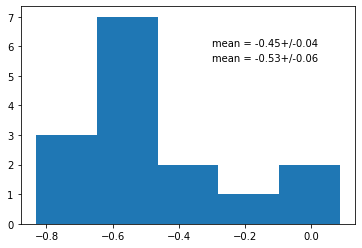

In [247]:
plt.figure()
plt.hist( unp.nominal_values(gamma), bins = 5)
plt.text(-0.3, 6, 'mean = {}'.format(gamma.mean()))
plt.text(-0.3, 5.5, 'mean = {}'.format(np.median( gamma)))
plt.show()

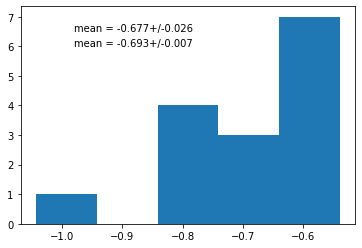

In [257]:
plt.figure()
plt.hist( unp.nominal_values(gamma_1500), bins = 5)
plt.text(-0.98, 6, 'mean = {}'.format(gamma_1500.mean()))
plt.text(-0.98, 6.5, 'mean = {}'.format(np.median( gamma_1500)))
plt.show()

Text(0, 0.5, '$\\gamma from MWA + 1500MHz')

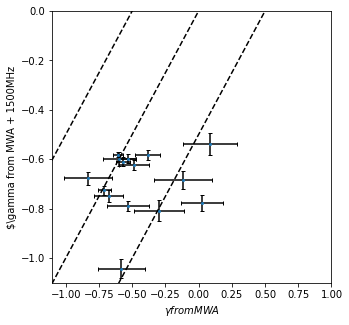

In [249]:
x = unp.nominal_values( gamma )
y = unp.nominal_values( gamma_1500)
x_err = unp.std_devs( gamma )
y_err = unp.std_devs( gamma_1500)

plt.figure(figsize=(5,5))
plt.errorbar(x, y, xerr=x_err, yerr = y_err, capsize=2, fmt='o', markersize=2, ecolor='black')
plt.plot(np.linspace(-2,1,100),np.linspace(-2,1,100), linestyle = 'dashed', c = 'black')
plt.plot(np.linspace(-2,1,100),np.linspace(-2,1,100)+0.5, linestyle = 'dashed', c = 'black')
plt.plot(np.linspace(-2,1,100),np.linspace(-2,1,100)-0.5, linestyle = 'dashed', c = 'black')
plt.xlim(-1.1,1)
plt.ylim(-1.1, 0)
plt.xlabel('$\gamma from MWA$', fontsize=10)
plt.ylabel('$\gamma from MWA + 1500MHz', fontsize=10)
# plt.savefig('y_error_bar.png')

Text(0, 0.5, '$SFR_{radio}[M_{\\odot} yr^{-1}]$')

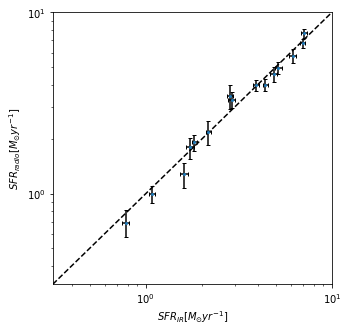

In [250]:
SFR_IR = table['SFR_IR'].values
x = unp.nominal_values(SFR_IR)
x_err = unp.std_devs(SFR_IR)
y = unp.nominal_values( SFR_radio )
y_err = unp.std_devs( SFR_radio)
plt.figure(figsize=(5,5))
plt.errorbar(x, y, xerr = x_err,yerr = y_err, capsize=2, fmt='o', markersize=2, ecolor='black')
plt.plot(10**np.linspace(-0.5,1,100),10**np.linspace(-0.5,1,100), linestyle = 'dashed', c = 'black')
plt.yscale('log')
plt.xscale('log')
plt.xlim(10**(-0.5), 1e+1)
plt.ylim(10**(-0.5), 1e+1)
plt.xlabel('$SFR_{IR}[M_{\odot} yr^{-1}]$', fontsize=10)
plt.ylabel('$SFR_{radio}[M_{\odot} yr^{-1}]$', fontsize=10)
# plt.savefig('y_error_bar.png')

Text(0, 0.5, '$SFR_{radio}[M_{\\odot} yr^{-1}]$')

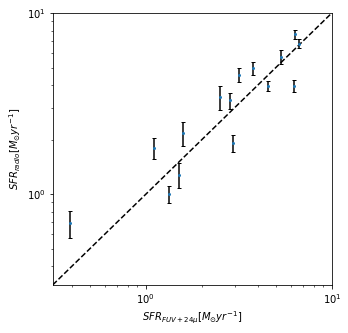

In [251]:
x = SFR_FUV
y = unp.nominal_values( SFR_radio )
y_err = unp.std_devs( SFR_radio)
plt.figure(figsize=(5,5))
plt.errorbar(x, y, yerr = y_err, capsize=2, fmt='o', markersize=2, ecolor='black')
plt.plot(10**np.linspace(-0.5,1,100),10**np.linspace(-0.5,1,100), linestyle = 'dashed', c = 'black')
plt.yscale('log')
plt.xscale('log')
plt.xlim(10**(-0.5), 1e+1)
plt.ylim(10**(-0.5), 1e+1)
plt.xlabel('$SFR_{FUV+24\mu}[M_{\odot} yr^{-1}]$', fontsize=10)
plt.ylabel('$SFR_{radio}[M_{\odot} yr^{-1}]$', fontsize=10)
# plt.savefig('y_error_bar.png')

Text(0, 0.5, '$SFR_{FUV+24\\mu}[M_{\\odot} yr^{-1}]$')

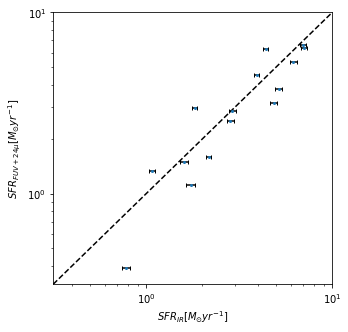

In [252]:
x = unp.nominal_values(SFR_IR)
x_err = unp.std_devs(SFR_IR)
y = SFR_FUV
plt.figure(figsize=(5,5))
plt.errorbar(x, y, xerr = x_err, capsize=2, fmt='o', markersize=2, ecolor='black')
plt.plot(10**np.linspace(-0.5,1,100),10**np.linspace(-0.5,1,100), linestyle = 'dashed', c = 'black')
plt.yscale('log')
plt.xscale('log')
plt.xlim(10**(-0.5), 1e+1)
plt.ylim(10**(-0.5), 1e+1)
plt.xlabel('$SFR_{IR}[M_{\odot} yr^{-1}]$', fontsize=10)
plt.ylabel('$SFR_{FUV+24\mu}[M_{\odot} yr^{-1}]$', fontsize=10)
# plt.savefig('y_error_bar.png')